### Importing Libraries

In [3]:
import os
import re
import numpy as np
import pandas as pd
import cv2
import subprocess
from functions import *
from OcrPdfToCsv import ImgToCsv
import PyPDF2
#from transaction_extractor import main_converter
from excel_to_table import *

In [3]:
folder_dir = r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\LANDCRAFT DEVELOPERS"

list_sheets,details = main_converter(folder_dir)

Started
Terminology found in sheet 1
Final table saved successfully
UTIB0000095 AXIS BANK Not Found Current Account {'from_date': '01-Feb-2021', 'to_date': '31-Mar-2021'} C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\LANDCRAFT DEVELOPERS\01.02.21 to 31.03.21_1.pdf
Started
Terminology found in sheet 1
Final table saved successfully
UTIB0000095 AXIS BANK Not Found Current Account {'from_date': '01-Feb-2022', 'to_date': '31-Mar-2022'} C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\LANDCRAFT DEVELOPERS\01.02.22 to 31.03.22_1.pdf
Started
Terminology found in sheet 1
Final table saved successfully
UTIB0000095 AXIS BANK Not Found Current Account {'from_date': '01-Feb-2023', 'to_date': '31-Mar-2023'} C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\LANDCRAFT DEVELOPERS\01.02.23 to 31.03.23_1.pdf
Started
Terminology found in sheet 1
Final table saved successfully
UTIB0000095 AXIS BANK ▁trf/r▁s▁land

In [6]:
details.to_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\LANDCRAFT DEVELOPERS\LANDCRAFT DEVELOPERS\details.csv",index=False)

### Defining pdf path and making relevant folders

In [ ]:
sample_bs_folder_path = r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\All_Bank_BS"

# making list of all pdf files in the folder
pdf_files = []
for root, dirs, files in os.walk(sample_bs_folder_path):
    for file in files:
        if file.endswith(".pdf"):
            pdf_files.append(os.path.join(root, file))

for pdf_path in pdf_files:
    images_folder_path, processed_images_folder_path, excel_folder_path = makeDirectories(pdf_path)

In [19]:
images_folder_path, processed_images_folder_path, excel_folder_path = makeDirectories(pdf_files[0])

### PDF Classification

In [3]:
first_page_image = pdf_to_images(pdf_files[1],first_page=1,last_page=1)

In [4]:
info,ifsc,bank = bank_details(first_page_image)

Keywords


In [6]:
bank

'KARUR VYSYA BANK'

In [7]:
OCR_needed = ["CANARA BANK","KOTAK MAHINDRA BANK"]

In [20]:
command = [
"python",
"ilovepdf.py",
f"--pdf_path={pdf_files[0]}",
f"--download_folder={excel_folder_path}"
]   

subprocess.run(command)


CompletedProcess(args=['python', 'ilovepdf.py', '--pdf_path=C:\\Users\\Lenovo\\OneDrive\\Desktop\\Folders\\NaharOm\\BSA\\Main_Project\\BankStatement\\All_Bank_BS\\01.02.23 to 31.03.23_1.pdf', '--download_folder=C:\\Users\\Lenovo\\OneDrive\\Desktop\\Folders\\NaharOm\\BSA\\Main_Project\\PdfData\\All_Bank_BS\\01.02.23 to 31.03.23_1\\ExcelData'], returncode=1)

In [77]:
excel_files_path = [os.path.join(excel_folder_path, file) for file in excel_files_list]

In [3]:
excel_files_list = [r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\LANDCRAFT DEVELOPERS\LANDCRAFT DEVELOPERS\01.02.23 to 31.03.23_1\ExcelData\01.02.23 to 31.03.23_1.xlsx"]

In [5]:
terminology = None
for i, excel_path in enumerate(excel_files_list):
    # drop the rows with non nan values less than 4 till we encounter more than or eqwua to 4 

    df = pd.read_excel(excel_path,header=None)
    while df.iloc[0].count() < 4:
        df = df.drop(labels=0)
        df.reset_index(drop=True, inplace=True)
    if df.iloc[0].dropna().apply(lambda x : is_pure_string(x)).all():
        terminology = df.iloc[0]
        df = df.drop(labels = 0)
        df.reset_index(drop=True, inplace=True)
    break

In [6]:
all_sheets = pd.read_excel(excel_files_list[0], sheet_name=None, header=None)

In [7]:
all_sheets['Table 1']

,0,1,2,3,4,5,6,7
0,LANDCRAFT DEVELOPERS PRIVATE LIMITED\nJoint Ho...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Statement of Axis Account No :095010200018151 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tran Date,Value Date,Transaction Particulars,Chq No,Amount(INR),DR/CR,Balance(INR),Branch Name
4,NaN,NaN,OPENING BALANCE,NaN,NaN,NaN,1590520.24,NaN
5,2023-02-01 00:00:00,2023-02-01 00:00:00,UPI/P2A/303203616264/AMIT WADH/ICICI Ban/UPI,NaN,5000,CR,1595520.24,GHAZIABAD [UP]
6,2023-02-02 00:00:00,2023-02-02 00:00:00,IMPS/P2A/303311939289/SPORTSTH/YESBANKL/Landcraf,NaN,43000,CR,1638520.24,GHAZIABAD [UP]
7,2023-02-03 00:00:00,2023-02-03 00:00:00,UPI/P2A/303435238612/PRATIMA /State Ban/NA,NaN,10000,CR,1648520.24,GHAZIABAD [UP]
8,2023-02-04 00:00:00,2023-02-04 00:00:00,BY CASH DEPOSIT-BNA/CPRH09504/9406/040223/GHAZIAB,NaN,5000,CR,1653520.24,GHAZIABAD [UP]
9,2023-02-04 00:00:00,2023-02-04 00:00:00,RTGS/ESFBR52023020452992933/MERIDIAN CITY PROJECT,NaN,2260384,CR,3913904.24,RTGS HUB


In [8]:
terminology

0                  Tran Date
1                 Value Date
2    Transaction Particulars
3                     Chq No
4                Amount(INR)
5                      DR/CR
6               Balance(INR)
7                Branch Name
Name: 0, dtype: object

In [9]:
def terminology_analyzer(terminology):
    values = list(terminology)
    date_idx = []
    date_num = 0
    balance_idx = None
    description_idx = []

    description_synonyms = ["description", "particulars", "narration","remarks"]
    withdraw_synonyms = ["withdraw", "debit"]
    deposit_synonyms = ["deposit", "credit"]
    cr_dr = False
    convention = [None,None]
    for i,value in enumerate(values):
        if value is not np.nan :
            if "dr" in value.lower() and "cr" in value.lower():
                cr_dr = i
                break
        
    if not cr_dr:
        for i,value in enumerate(values):
            if value is not np.nan :
                if "withdraw" in value.lower() or "debit" in value.lower():
                    withdraw_idx = i
                    
                elif "deposit" in value.lower() or "credit" in value.lower():
                    deposit_idx = i
        convention = [cr_dr,[withdraw_idx,deposit_idx]]
    else:
        for i,value in enumerate(values):
            if value is not np.nan :
                if "amount" in value.lower():
                    amount_idx = i
        convention = [cr_dr,[amount_idx]]

    for i, value in enumerate(values):
        if value is not np.nan :
            if "date" in value.lower():
                date_idx.append(i)
                date_num += 1
            elif "balance" in value.lower():
                balance_idx = i
            else :
                for synonym in description_synonyms:
                    if synonym in value.lower():
                        description_idx.append(i)
                        break
    return date_idx, date_num, balance_idx, description_idx, convention

In [10]:
dates_idx,dates_num,balance_idx,description_idx,convention=terminology_analyzer(terminology)

In [96]:
all_nan = df.iloc[:, dates_idx].isna().all().values[0]
print(all_nan)


True


In [12]:
def find_date_index(dates_idx, df):
    for i in dates_idx:
        if df.iloc[:, i].dropna().apply(lambda x: is_date(x)).all():
            return i
    return None

date_index = find_date_index(dates_idx, df)


TypeError: Parser must be a string or character stream, not datetime

In [95]:
df.iloc[:,description_idx]

,3
0,IB:AL AZAN BL RELEASE
1,R S ENTERPRISES
2,FDRL0001369
3,MB:naushad 3 shipts
4,advance
5,Chrg: IMPS Transaction
6,Date:29/04/2021)
7,FRESH N FROZEN
8,FOODTECH ICIC00
9,IB:BL FOR FNF 002


In [43]:
terminology

0              DATE
1         NARRATION
2           CHQ.NO.
4    WITHDRAWAL(DR)
5       DEPOSIT(CR)
6      BALANCE(INR)
Name: 0, dtype: object

In [86]:
df

,0,1,2,3,4,5,6,7,8,9
0,1,30/04/2021,NaN,IB:AL AZAN BL RELEASE,NaN,000212179040,"159,428.00",DR,"42,955.00",CR
1,2,30/04/2021,NaN,R S ENTERPRISES,NaN,NEFTINW-0286587917,"80,000.00",CR,"202,383.00",CR
2,NaN,NaN,NaN,FDRL0001369,NaN,NaN,NaN,NaN,NaN,NaN
3,3,30/04/2021,NaN,MB:naushad 3 shipts,NaN,000212056359,"150,000.00",DR,"122,383.00",CR
4,NaN,NaN,NaN,advance,advance,NaN,NaN,NaN,NaN,NaN
5,4,30/04/2021,NaN,Chrg: IMPS Transaction,NaN,TBMS-737341684,5.90,DR,"272,383.00",CR
6,NaN,NaN,NaN,Date:29/04/2021),NaN,NaN,NaN,NaN,NaN,NaN
7,5,29/04/2021,NaN,FRESH N FROZEN,NaN,NEFTINW-0286270197,"200,000.00",CR,"272,388.90",CR
8,NaN,NaN,NaN,FOODTECH ICIC00,NaN,NaN,NaN,NaN,NaN,NaN
9,6,29/04/2021,NaN,IB:BL FOR FNF 002,NaN,000211967498,"99,081.00",DR,"72,388.90",CR


Procedure wise solution:

In [108]:
excel_files_list = [r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\All_Bank_BS\UNION-OCT_unlocked.xlsx"]

all_sheets = pd.read_excel(excel_files_list[0], sheet_name=None, header=None)

for sheet_name,df in all_sheets.items():
    print(sheet_name)
    df1  = df
    break

Table 1


In [109]:
df1

,0,1,2,3,4,5,6,7
0,DETAILS OF STATEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,: A.S.P. TRADERS,NaN,NaN,Customer/CIF ID,NaN,: 1000387434,NaN
2,Address,:,NaN,NaN,Account Type,NaN,: Current Account,NaN
3,City,:,NaN,NaN,Account Number,NaN,: 510101002417625,NaN
4,State,:,NaN,NaN,Currency,NaN,: INR,NaN
5,Pincode,:,NaN,NaN,Branch Address,NaN,": SURYA PRAKASAM ROAD 29 & 30, AMBATTUR AMBATTUR",NaN
6,Mobile No,: 919840235724,NaN,NaN,NaN,NaN,NaN,NaN
7,Email Id,: asptraders2006@yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN
8,Home Branch,: AMBATTUR,NaN,NaN,NaN,NaN,NaN,NaN
9,IFSC,: UBIN0907812,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
import deepdoctection as dd
from IPython.core.display import HTML
from matplotlib import pyplot as plt

In [115]:
analyzer = dd.get_dd_analyzer()  # instantiate the built-in analyzer similar to the Hugging Face space demo

[0405 12:36.25 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_publaynet_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/143 [00:00<?, ?B/s]

d2_model_1639999_item_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0405 12:39.59 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_rc_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/143 [00:00<?, ?B/s]

d2_model_1849999_cell_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0405 12:44.55 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_c_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/141 [00:00<?, ?B/s]

[0405 12:46.51 @doctectionpipe.py:84]  INF  Processing CANARA-OCT_unlocked_0.pdf
[0405 12:47.05 @context.py:126]  INF  ImageLayoutService total: 11.2848 sec.
[0405 12:47.19 @context.py:126]  INF  SubImageLayoutService total: 14.3666 sec.
[0405 12:47.31 @context.py:126]  INF  SubImageLayoutService total: 12.2555 sec.
[0405 12:47.32 @context.py:126]  INF  TableSegmentationService total: 0.1259 sec.
[0405 12:47.32 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:47.32 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:47.32 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:47.32 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:47.32 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0669 sec.
[0405 12:47.35 @context.py:126]  INF  TextExtractionService total: 3.4874 sec.
[0405 12:47.35 @context.py:126]  INF  MatchingService total: 0.0085 s

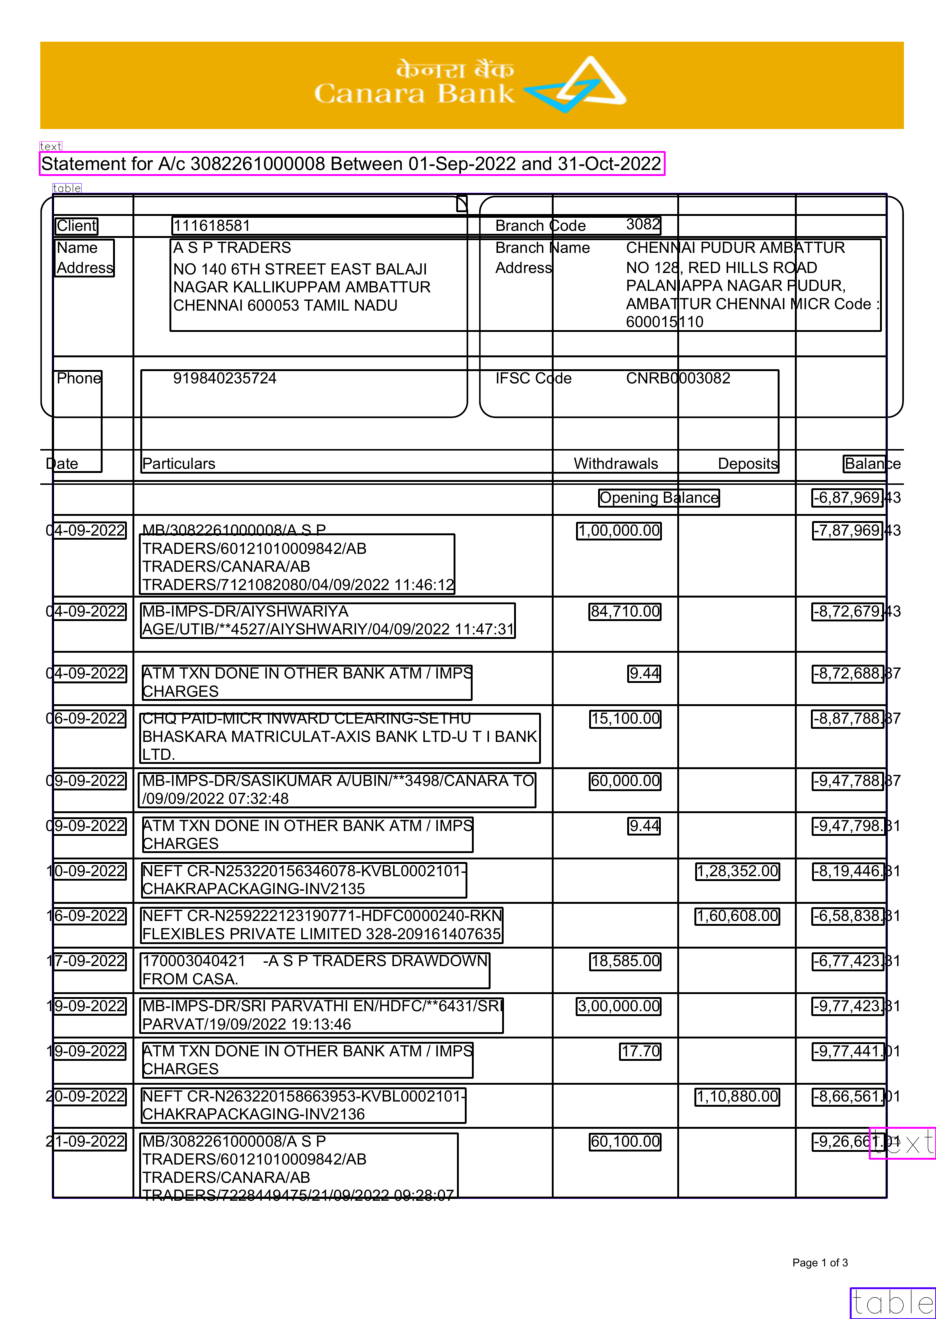

In [116]:
df = analyzer.analyze(path =r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\All_Bank_BS\CANARA-OCT_unlocked.pdf")  # setting up pipeline
df.reset_state()                 # Trigger some initialization

doc = iter(df)
page = next(doc) 

image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [119]:
HTML(page.tables[0].html)

In [117]:
len(page.tables)

1

In [125]:
for i in df:
    print(i)

[0405 12:52.07 @doctectionpipe.py:84]  INF  Processing CANARA-OCT_unlocked_0.pdf
[0405 12:52.21 @context.py:126]  INF  ImageLayoutService total: 11.9551 sec.
[0405 12:52.33 @context.py:126]  INF  SubImageLayoutService total: 12.5074 sec.
[0405 12:52.47 @context.py:126]  INF  SubImageLayoutService total: 13.6827 sec.
[0405 12:52.47 @context.py:126]  INF  TableSegmentationService total: 0.1076 sec.
[0405 12:52.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:52.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:52.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:52.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:52.47 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0343 sec.
[0405 12:52.51 @context.py:126]  INF  TextExtractionService total: 3.764 sec.
[0405 12:52.51 @context.py:126]  INF  MatchingService total: 0.008 sec

Page(file_name='CANARA-OCT_unlocked_0.pdf', location='C:\\Users\\Lenovo\\OneDrive\\Desktop\\Folders\\NaharOm\\BSA\\Main_Project\\BankStatement\\All_Bank_BS\\CANARA-OCT_unlocked.pdf', document_id='3ef4301c-9fca-3891-bc53-f222ae5a5bc6', _image_id='90e2e51b-cc89-3ed6-a6a6-a8d4695186a0', embeddings={'90e2e51b-cc89-3ed6-a6a6-a8d4695186a0': BoundingBox(absolute_coords=True, ulx=0.0, uly=0.0, lrx=2480.0, lry=3509.0, height=3509.0, width=2480.0)}, annotations=[Layout(active=True, _annotation_id='f39426ae-6a27-3032-b647-c86db2a82416', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.9799208045005798, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='6934598c-a2ae-33e9-976b-2008ef15d4ac', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='1', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['9dad98e8-1a5d-3022-bcd7-b

KeyboardInterrupt: 

In [126]:
page = next(doc)

[0405 12:53.34 @doctectionpipe.py:84]  INF  Processing CANARA-OCT_unlocked_1.pdf
[0405 12:53.48 @context.py:126]  INF  ImageLayoutService total: 12.2154 sec.
[0405 12:54.07 @context.py:126]  INF  SubImageLayoutService total: 18.2535 sec.
[0405 12:54.29 @context.py:126]  INF  SubImageLayoutService total: 22.7911 sec.
[0405 12:54.29 @context.py:126]  INF  TableSegmentationService total: 0.1276 sec.
[0405 12:54.29 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:54.29 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:54.29 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:54.29 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0405 12:54.29 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0547 sec.
[0405 12:54.33 @context.py:126]  INF  TextExtractionService total: 3.7622 sec.
[0405 12:54.33 @context.py:126]  INF  MatchingService total: 0.0098 s

In [127]:
HTML(page.tables[0].html)

21-09-2022,MB-IMPS-DR/SRI PARVATHI EN/HDFC/**6431/SRI PARVAT/21/09/2022 09:29:25,"35,000.00",,"-9,61,661.01"
21-09-2022,ATM TXN DONE IN OTHER BANK ATM / IMPS CHARGES,9.44,,"-9,61,670.45"
21-09-2022,MB-IMPS-DR/ARUN KUMAR MANO/HDFC/**1070/GST JULY A/21/09/2022 14:27:32,"2,000.00",,"-9,63,670.45"
22-09-2022,NEFT CR-CIUBH22265086661-CIUB0000114-SRI SAPTHAGIRI HITECH POLYMERS-/ATTN/,,"71,904.00","-8,91,766.45"
23-09-2022,MB-IMPS-DR/HAKKEEM A/KVBL/**5892/KERALA DRI/23/09/2022 08:36:46,"19,500.00",,"-9,11,266.45"
23-09-2022,MB-IMPS-DR/KALLUPURACKAL S/KVBL/**2081/KALLUPURAC/23/09/2022 11:00:23,"67,000.00",,"-9,78,266.45"
23-09-2022,ATM TXN DONE IN OTHER BANK ATM / IMPS CHARGES,9.44,,"-9,78,275.89"
23-09-2022,SMS ALERT CHARGES NEW,18.00,,"-9,78,293.89"
26-09-2022,NEFT CR-N269222134142607-HDFC0000240-FLORA LAMINATE-NEFT - ASP-57500000634002 - FLORA,,"1,10,544.00","-8,67,749.89"
29-09-2022,NEFT CR-PUNBH22272113854-PUNB0016510- MULTIFLEX POLYBAGS PRIVATE LIMITED-NULL,,"48,434.00","-8,19,315.89"
30-09-2022,170003040421 -A S P TRADERS DRAWDOWN FROM CASA.,"16,442.00",,"-8,35, 757.89"


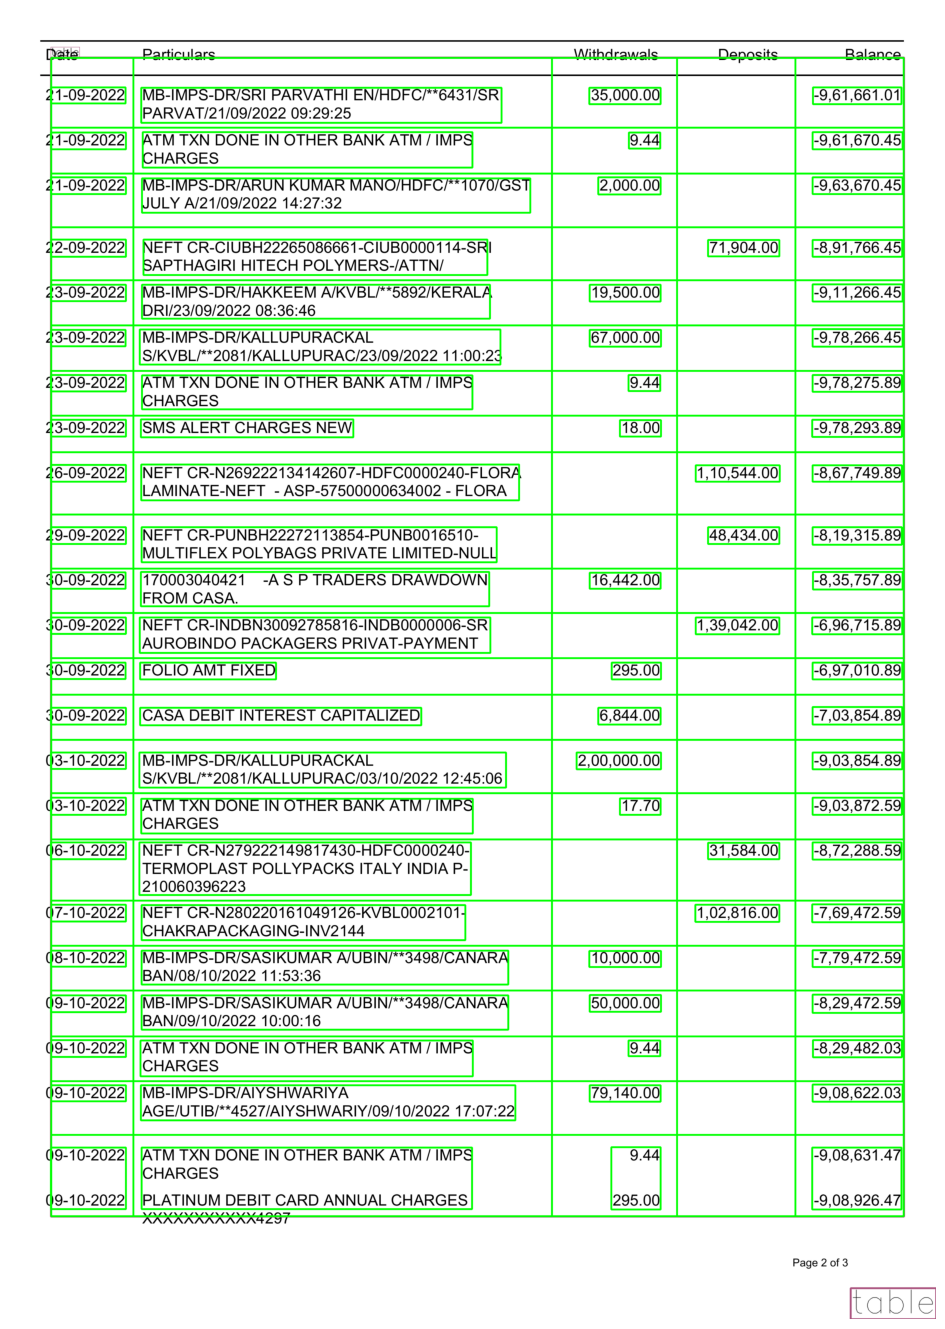

In [128]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [132]:
page.words

[Word(active=True, _annotation_id='72430881-5c13-39fc-841f-85940c4a8468', category_name=<LayoutType.word>, _category_name=<LayoutType.word>, category_id='1', score=0.9656104999999999, sub_categories={<WordType.characters>: ContainerAnnotation(active=True, _annotation_id='95c17d10-20cc-3254-ad20-71ea5a740a48', category_name=<WordType.characters>, _category_name=<WordType.characters>, category_id='None', score=0.9656104999999999, sub_categories={}, relationships={}, value='Date')}, relationships={}, bounding_box=BoundingBox(absolute_coords=True, ulx=98, uly=104, lrx=181, lry=135, height=31, width=83)),
 Word(active=True, _annotation_id='828232fd-014e-386b-b884-333c83d7640d', category_name=<LayoutType.word>, _category_name=<LayoutType.word>, category_id='1', score=0.96679451, sub_categories={<WordType.characters>: ContainerAnnotation(active=True, _annotation_id='3e31c82a-cd2c-3400-82ed-c90a08a3fe16', category_name=<WordType.characters>, _category_name=<WordType.characters>, category_id='N

### New

In [3]:
excel_sheet_path = r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\MAA TARINI Agencies\FY - 2022-2023 BANK STATEMENT.xls"
excel_folder_path = r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\MAA TARINI Agencies"

In [4]:
final_df = excel_to_table(excel_sheet_path,excel_folder_path)

Terminology found in sheet 1
Final table saved successfully


In [5]:
final_df.to_excel(os.path.join(excel_folder_path,"final_df_2.xlsx"),index=False)

In [14]:
excel_sheets = pd.read_excel(excel_sheet_path, sheet_name=None,header=None)

# Dropping the rows with all NaN values
for (sheet,sheet_name) in zip(excel_sheets,excel_sheets.keys()):
    excel_sheets[sheet].dropna(axis=0, how='all', inplace=True)
    excel_sheets[sheet].reset_index(drop=True, inplace=True)

# Dropping sheets with less than 5 rows and 4 columns (Not having enough data)
excel_sheet_list = []
for (sheet,sheet_name) in zip(excel_sheets,excel_sheets.keys()):
    if len(excel_sheets[sheet]) >= 5 and excel_sheets[sheet].shape[1] >= 4:
        excel_sheet_list.append(excel_sheets[sheet].copy())

# Parsing the terminology
terminology = None
for i in range(len(excel_sheet_list)):
    while True:
        row_1 = excel_sheet_list[i].iloc[0]
        row_1_concatenated = ' '.join(row_1.dropna().astype(str))
        words_count = len(row_1_concatenated.split())
        if words_count > 15 and row_1.dropna().count() < 4:
            excel_sheet_list[i].drop(labels =0,inplace=True)
            excel_sheet_list[i].reset_index(drop=True,inplace=True)
            continue
        
        if "balance" in row_1_concatenated.lower() and (("description" in row_1_concatenated.lower() or "particular" in row_1_concatenated.lower() or "narration" in row_1_concatenated.lower() or "remarks" in row_1_concatenated.lower()) or ("date" in row_1_concatenated.lower())):
            if "date" not in row_1_concatenated.lower() and "date" in ' '.join(excel_sheet_list[i].iloc[1].dropna().astype(str)).lower():
                excel_sheet_list[i].iloc[0] = excel_sheet_list[i].iloc[0].astype(str) + ' ' + excel_sheet_list[i].iloc[1].astype(str)
                excel_sheet_list[i].drop(labels =1,inplace=True)
                excel_sheet_list[i].reset_index(drop=True, inplace=True)
            terminology = excel_sheet_list[i].iloc[0]
            break
        else :
            excel_sheet_list[i].drop(labels =0,inplace=True)
            excel_sheet_list[i].reset_index(drop=True,inplace=True)

    if len(excel_sheet_list[i].iloc[0].dropna()) < 3:
        terminology = None
    if terminology is not None:
        print(f"Terminology found in sheet {i+1}")
        break

Terminology found in sheet 1


In [62]:
date_formats = [
        "%Y-%m-%d",  # "2022-11-28"
        "%d/%m/%Y",  # "11/01/2023"
        "%d-%b-%y",  # "01-FEB-23"
        "%d-%b-%Y",
        "%B %d %Y",
        "%Y-%m-%dT%H:%M:%S",  # ISO format with time
        "%Y-%m-%d",  # ISO format without time
        "%m/%d/%Y",  # Month/Day/Year
        "%m/%d/%y",  # Month/Day/Year (short year)
        "%d-%m-%Y",  # Day-Month-Year
        "%Y%m%d",  # Basic ISO format without separators
        "%d/%m/%Y",  # Day/Month/Year
        "%d/%m/%y",  # Day/Month/Year (short year)
        "%b %d, %Y",  # Month abbreviation Day, Year (e.g., Jan 01, 2023)
        "%B %d, %Y",  # Month full name Day, Year (e.g., January 01, 2023)
        "%d %b %Y",  # Day Month abbreviation Year (e.g., 01 Jan 2023)
        "%d %B %Y",  # Day Month full name Year (e.g., 01 January 2023)
        "%Y-%m-%dT%H:%M:%S.%f",  # ISO format with microseconds
        "%Y-%m-%dT%H:%M:%S.%fZ",  # ISO format with microseconds and Zulu timezone
        "%Y/%m/%d",  # Year/Month/Day
        "%Y.%m.%d",  # Year.Month.Day
        "%d.%m.%Y",  # Day.Month.Year
        "%Y.%m.%d %H:%M:%S",  # Year.Month.Day Hour:Minute:Second
        "%d.%m.%Y %H:%M:%S",  # Day.Month.Year Hour:Minute:Second
        "%d,%m,%Y",
        "%d,%m,%y"
    ]
def check_date_2(date_string):
    
    try:
        if date_string is None or date_string == '':
            return date_string
        for date_format in date_formats:
            try:
                parsed_date = datetime.strptime(date_string.strip(), date_format)
                return True
            except ValueError:
                continue
        return False
    except:
        return False

In [15]:
# Dropping the rows which are not recording transactions
for i in range(len(excel_sheet_list)):
    diff = excel_sheet_list[i].apply(lambda x : diff_first_last_non_nan(x),axis=1)
    excel_sheet_list[i] = excel_sheet_list[i][diff>2].copy()
    
    for j, row in excel_sheet_list[i].iterrows():
        if row.dropna().apply(lambda x: is_pure_string(x)).all():
            excel_sheet_list[i].drop(labels = j,inplace=True)
    excel_sheet_list[i].reset_index(drop=True, inplace=True)

# Dropping the rows which don't have dates in any of the columns
#Dropping the columns which don't have dates in any of the rows
for i in range(len(excel_sheet_list)):
    date_cell_prev = None
    for j, row in excel_sheet_list[i].iterrows():
        date_cell = None
        for k, cell in enumerate(row):
            if check_date(cell):
                date_cell = k
                break
        if date_cell is None:
            excel_sheet_list[i].drop(labels = j,inplace=True)
            continue
        if date_cell_prev is not None:
            if date_cell != date_cell_prev:
                excel_sheet_list[i].drop(labels = j,inplace=True)
                continue
        else :
            date_cell_prev = date_cell
    
    excel_sheet_list[i].dropna(axis=1, how='all', inplace=True)
    excel_sheet_list[i].reset_index(drop=True, inplace=True)
    excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1]) 

    if excel_sheet_list[i].shape[0] == 0:
        excel_sheet_list.pop(i)

In [6]:
parse("2023-01-28 13:44:",fuzzy=False)

ParserError: Unknown string format: 2023-01-28 13:44:

In [10]:
def column_index_processed(terminology,excel_sheet_list):
    terminology = terminology_preprocessing(terminology)
    dates_idx,dates_num,balance_idx,description_idx,convention=terminology_analyzer(terminology)        
    if convention[0] and convention[1][0]==None:
        for i,row in excel_sheet_list[0].iterrows():
            if row.dropna().apply(lambda x: check_date(x)).any():
                break
        for i,val in enumerate(row):
            if "cr" in str(val).lower() or "dr" in str(val).lower():
                convention[1][0] = row.index[i]
    if convention[0] and not convention[1][0]:
        convention[1][0] = convention[1][1]
    return dates_idx,dates_num,balance_idx,description_idx,convention

In [11]:
# Finding the column names in the terminology
non_nan_column_indexes = len(terminology_preprocessing(terminology).dropna())

# Finding the indexes of the columns in the terminology
dates_idx,dates_num,balance_idx,description_idx,convention = column_index_processed(terminology,excel_sheet_list)

In [12]:
non_nan_column_indexes

8

In [13]:
dates_idx,dates_num,balance_idx,description_idx,convention

([0, 1], 2, 7, 4, [False, [5, 6]])

In [13]:
# Cleaning the individual sheets
for i in range(len(excel_sheet_list)):
    if excel_sheet_list[i].shape[1] < non_nan_column_indexes:
        # add a nan column jst after description column
        if excel_sheet_list[i][dates_idx[0]].dropna().apply(lambda x: check_date(x)).all():
            pass
        elif dates_idx[0]>0 and excel_sheet_list[i][dates_idx[0]-1].dropna().apply(lambda x: check_date(x)).all():
            excel_sheet_list[i].insert(dates_idx[0]-1, 'nan', np.nan)
            excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])
            continue

        if excel_sheet_list[i][description_idx].apply(lambda x: is_pure_string(x)).all():
            pass
        elif description_idx>0 and excel_sheet_list[i][description_idx-1].apply(lambda x: is_pure_string(x)).all(): # type: ignore
            excel_sheet_list[i].insert(description_idx-1, 'nan', np.nan) # type: ignore
            excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])
            continue


        excel_sheet_list[i].insert(description_idx+1, 'nan', np.nan) # type: ignore
        excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])
    
    elif excel_sheet_list[i].shape[1] > non_nan_column_indexes:
        # add a nan column jst after description column
        difference = excel_sheet_list[i].shape[1] - non_nan_column_indexes
        column_to_delete = [description_idx+1+i for i in range(difference)] # type: ignore
        excel_sheet_list[i].drop(columns=column_to_delete,inplace=True) # type: ignore
        excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])

# Extracting the final tables
final_extracted_sheets = []
for i in range(len(excel_sheet_list)):
    try:
        extracted_sheet = excel_sheet_list[i].iloc[:,[dates_idx[0],description_idx,convention[1][0],convention[1][1],balance_idx]]

        final_extracted_sheets.append(extracted_sheet)
    except IndexError:
        pass

last_sheets = extracted_sheet_processing(final_extracted_sheets,dates_idx,dates_num,balance_idx,description_idx,convention)

# Concatenating the final tables
final_df = pd.concat(last_sheets,ignore_index=True)

# Saving the final table
#final_df.to_csv(os.path.join(download_folder,"final_table.csv"),index=False)

print("Final table saved successfully")

Final table saved successfully


In [21]:
last_sheets[1]

,Date,Description,Debit,Credit,Balance


In [26]:
def is_pure_string(s):
    return isinstance(s, str) and not is_number(amount_parser(s)) and not is_date(s)

In [27]:
excel_sheet_list[i][5].apply(lambda x: is_pure_string(x))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: 5, dtype: bool

In [98]:
excel_sheets_folder = r"C:\Users\Lenovo\OneDrive\Desktop\Folders\NaharOm\BSA\Main_Project\BankStatement\MVH SOLUTIONS\MVH SOLUTIONS\FY 2020-21 2021-22 2022-23\ExcelData"
excel_files = [f for f in os.listdir(excel_sheets_folder) if f.endswith('.csv')]

excel_files_list = [os.path.join(excel_sheets_folder, f) for f in excel_files]

# excel_files_list = excel_files_list[2:] + excel_files_list[:2]
excel_sheet_list = []
for file in excel_files_list:
    sheet = pd.read_csv(file,header=None)
    sheet.dropna(axis=0, how='all', inplace=True)
    sheet.reset_index(drop=True, inplace=True)
    if len(sheet) >= 5 or sheet.shape[1] >= 4:
        excel_sheet_list.append(sheet)

terminology = None
for i in range(len(excel_sheet_list)):
    for j,row in excel_sheet_list[i].iterrows():
        row_1_concatenated = ' '.join(row.dropna().astype(str))

        if "balance" in row_1_concatenated.lower() and (("description" in row_1_concatenated.lower() or "particular" in row_1_concatenated.lower() or "narration" in row_1_concatenated.lower() or "remarks" in row_1_concatenated.lower()) or ("date" in row_1_concatenated.lower())):
            if "date" not in row_1_concatenated.lower() and "date" in ' '.join(excel_sheet_list[i].iloc[j+1].dropna().astype(str)).lower():
                excel_sheet_list[i].iloc[j] = excel_sheet_list[i].iloc[j].astype(str) + ' ' + excel_sheet_list[i].iloc[j+1].astype(str)
                excel_sheet_list[i].drop(labels =j+1,inplace=True)
                excel_sheet_list[i].reset_index(drop=True, inplace=True)
            terminology = excel_sheet_list[i].iloc[j]
            break

    if terminology is not None:
        print(f"Terminology found in sheet {i+1}")
        break

for i in range(len(excel_sheet_list)):
    j = 0
    first_date_encountered = False
    while j < excel_sheet_list[i].shape[0]:
        is_date = False
        for k, cell in enumerate(excel_sheet_list[i].iloc[j].dropna()):
            if check_date(cell):
                if not first_date_encountered:
                    first_date_encountered = True

                is_date = True
                break

        if not is_date and first_date_encountered:
            non_nan_idx = excel_sheet_list[i].iloc[j].dropna().index[0]
            if excel_sheet_list[i].iloc[j].dropna().count() == 1 and is_pure_string(excel_sheet_list[i].iloc[j].dropna().values[0]) and is_pure_string(excel_sheet_list[i].iloc[j-1][non_nan_idx]):
                excel_sheet_list[i].iloc[j-1,non_nan_idx] = excel_sheet_list[i].iloc[j-1,non_nan_idx] + ' ' + excel_sheet_list[i].iloc[j,non_nan_idx]
                excel_sheet_list[i].drop(labels = j,inplace=True)
                excel_sheet_list[i].reset_index(drop=True, inplace=True)
            else:
                excel_sheet_list[i].drop(labels = j,inplace=True)
                excel_sheet_list[i].reset_index(drop=True, inplace=True)
        else :
            j += 1

for i in range(len(excel_sheet_list)):
    diff = excel_sheet_list[i].apply(lambda x : diff_first_last_non_nan(x),axis=1)
    excel_sheet_list[i] = excel_sheet_list[i][diff>2].copy()
    
    for j, row in excel_sheet_list[i].iterrows():
        if  row.dropna().apply(lambda x: is_pure_string(x)).all():
            excel_sheet_list[i].drop(labels = j,inplace=True)
    excel_sheet_list[i].reset_index(drop=True, inplace=True)

for i in range(len(excel_sheet_list)):
    date_cell_prev = None
    for j, row in excel_sheet_list[i].iterrows():
        date_cell = None
        for k, cell in enumerate(row):
            if check_date(cell):
                date_cell = k
                break
        if date_cell is None:
            excel_sheet_list[i].drop(labels = j,inplace=True)
            continue
        if date_cell_prev is not None:
            if date_cell != date_cell_prev:
                excel_sheet_list[i].drop(labels = j,inplace=True)
                continue
        else :
            date_cell_prev = date_cell
    
    excel_sheet_list[i].dropna(axis=1, how='all', inplace=True)
    excel_sheet_list[i].reset_index(drop=True, inplace=True)
    excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])     

non_nan_column_indexes = len(terminology_preprocessing(terminology).dropna())
dates_idx,dates_num,balance_idx,description_idx,convention = column_index_processed(terminology,excel_sheet_list)
print(dates_idx,dates_num,balance_idx,description_idx,convention)
for i in range(len(excel_sheet_list)):
    for j, row in excel_sheet_list[i].iterrows():
        # drop row if balance is not present
        if np.isnan(amount_parser(row[balance_idx])):
            excel_sheet_list[i].drop(labels = j,inplace=True)
    excel_sheet_list[i].reset_index(drop=True, inplace=True)

for i in range(len(excel_sheet_list)):
    if excel_sheet_list[i].shape[0] == 0:
        continue
    if excel_sheet_list[i].shape[1] < non_nan_column_indexes:
        # add a nan column jst after description column
        if excel_sheet_list[i][dates_idx[0]].dropna().apply(lambda x: check_date(x)).all():
            pass
        elif dates_idx[0]>0 and excel_sheet_list[i][dates_idx[0]-1].dropna().apply(lambda x: check_date(x)).all():
            excel_sheet_list[i].insert(dates_idx[0]-1, 'nan', np.nan)
            excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])
            continue

        if excel_sheet_list[i][description_idx].apply(lambda x: is_pure_string(x)).all():
            pass
        elif description_idx>0 and excel_sheet_list[i][description_idx-1].apply(lambda x: is_pure_string(x)).all(): # type: ignore
            excel_sheet_list[i].insert(description_idx-1, 'nan', np.nan) # type: ignore
            excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])
            continue


        excel_sheet_list[i].insert(description_idx+1, 'nan', np.nan) # type: ignore
        excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])
    
    elif excel_sheet_list[i].shape[1] > non_nan_column_indexes:
        # if there are zero values in balance, see if there is a column to right and assign it to balance
        difference = excel_sheet_list[i].shape[1] - non_nan_column_indexes
        column_to_delete = [description_idx+1+i for i in range(difference)] # type: ignore
        excel_sheet_list[i].drop(columns=column_to_delete,inplace=True) # type: ignore
        excel_sheet_list[i].columns = range(excel_sheet_list[i].shape[1])

final_extracted_sheets = []
for i in range(len(excel_sheet_list)):
    if excel_sheet_list[i].shape[0] == 0:
        continue
    extracted_sheet = excel_sheet_list[i].iloc[:,[dates_idx[0],description_idx,convention[1][0],convention[1][1],balance_idx]]

    final_extracted_sheets.append(extracted_sheet)
last_sheets = extracted_sheet_processing(final_extracted_sheets,dates_idx,dates_num,balance_idx,description_idx,convention)
# concatenate all the sheets -
final_df = pd.concat(last_sheets,ignore_index=True)
# save the final df to a csv file

Terminology found in sheet 2


In [99]:
excel_sheet_list[0]

,0,1,2,3,4,5,6,7
0,01-APR-20,01-APR-20,0.0,NaN,B/F ...,0.00,"666,723.64","666,723.64"
1,30-APR-20,30-APR-20,18556.0,3.400624e+11,FT-DR- 85563100000012- OLTAS COLLECTION ACC,"229,210.00",0.00,"437,513.64"
2,26-JUN-20,26-JUN-20,19001.0,3.400624e+11,TOCLGCHEQUE PAID IN CLEARING- SERVBR-DELHI-FOR...,"2,391.00",0.00,"435,122.64"
3,07-JUL-20,07-JUL-20,18556.0,3.400624e+11,NEFT: P20070755289272:GST,"147,872.00",0.00,"287,250.64"
4,07-JUL-20,07-JUL-20,18556.0,NaN,NEFT SERVICE CHARGESWITH GST AT18PC,17.40,0.00,"287,233.24"
5,16-JUL-20,16-JUL-20,18556.0,3.400624e+11,NEFT: P20071663151164:GST,"13,600.00",0.00,"273,633.24"
6,16-JUL-20,16-JUL-20,18556.0,NaN,NEFT SERVICE CHARGES WITH GST AT 18PC,5.60,0.00,"273,627.64"
7,21-JUL-20,22-JUL-20,18556.0,9.039670e+11,BYCLG-CTS-1DAY FLOAT-HDFC BANK,0.00,"85,687.00","359,314.64"
8,04-AUG-20,04-AUG-20,19001.0,3.400624e+11,TOCLG:CHEQUE PAID IN CLEARING- SERVBR-DELHI-FO...,700.00,0.00,"358,614.64"
9,25-AUG-20,26-AUG-20,18556.0,1.001383e+11,BYCLG-CTS-1DAY FLOAT-IND BANK,0.00,"199,546.00","558,160.64"


In [16]:
final_df.to_csv(os.path.join(excel_sheets_folder,"final_df.csv"),index=False)